In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path[0] = '/home/bram/ANTS/entropy/'
from core.plugins.helper_classes import RNG

# Ant 

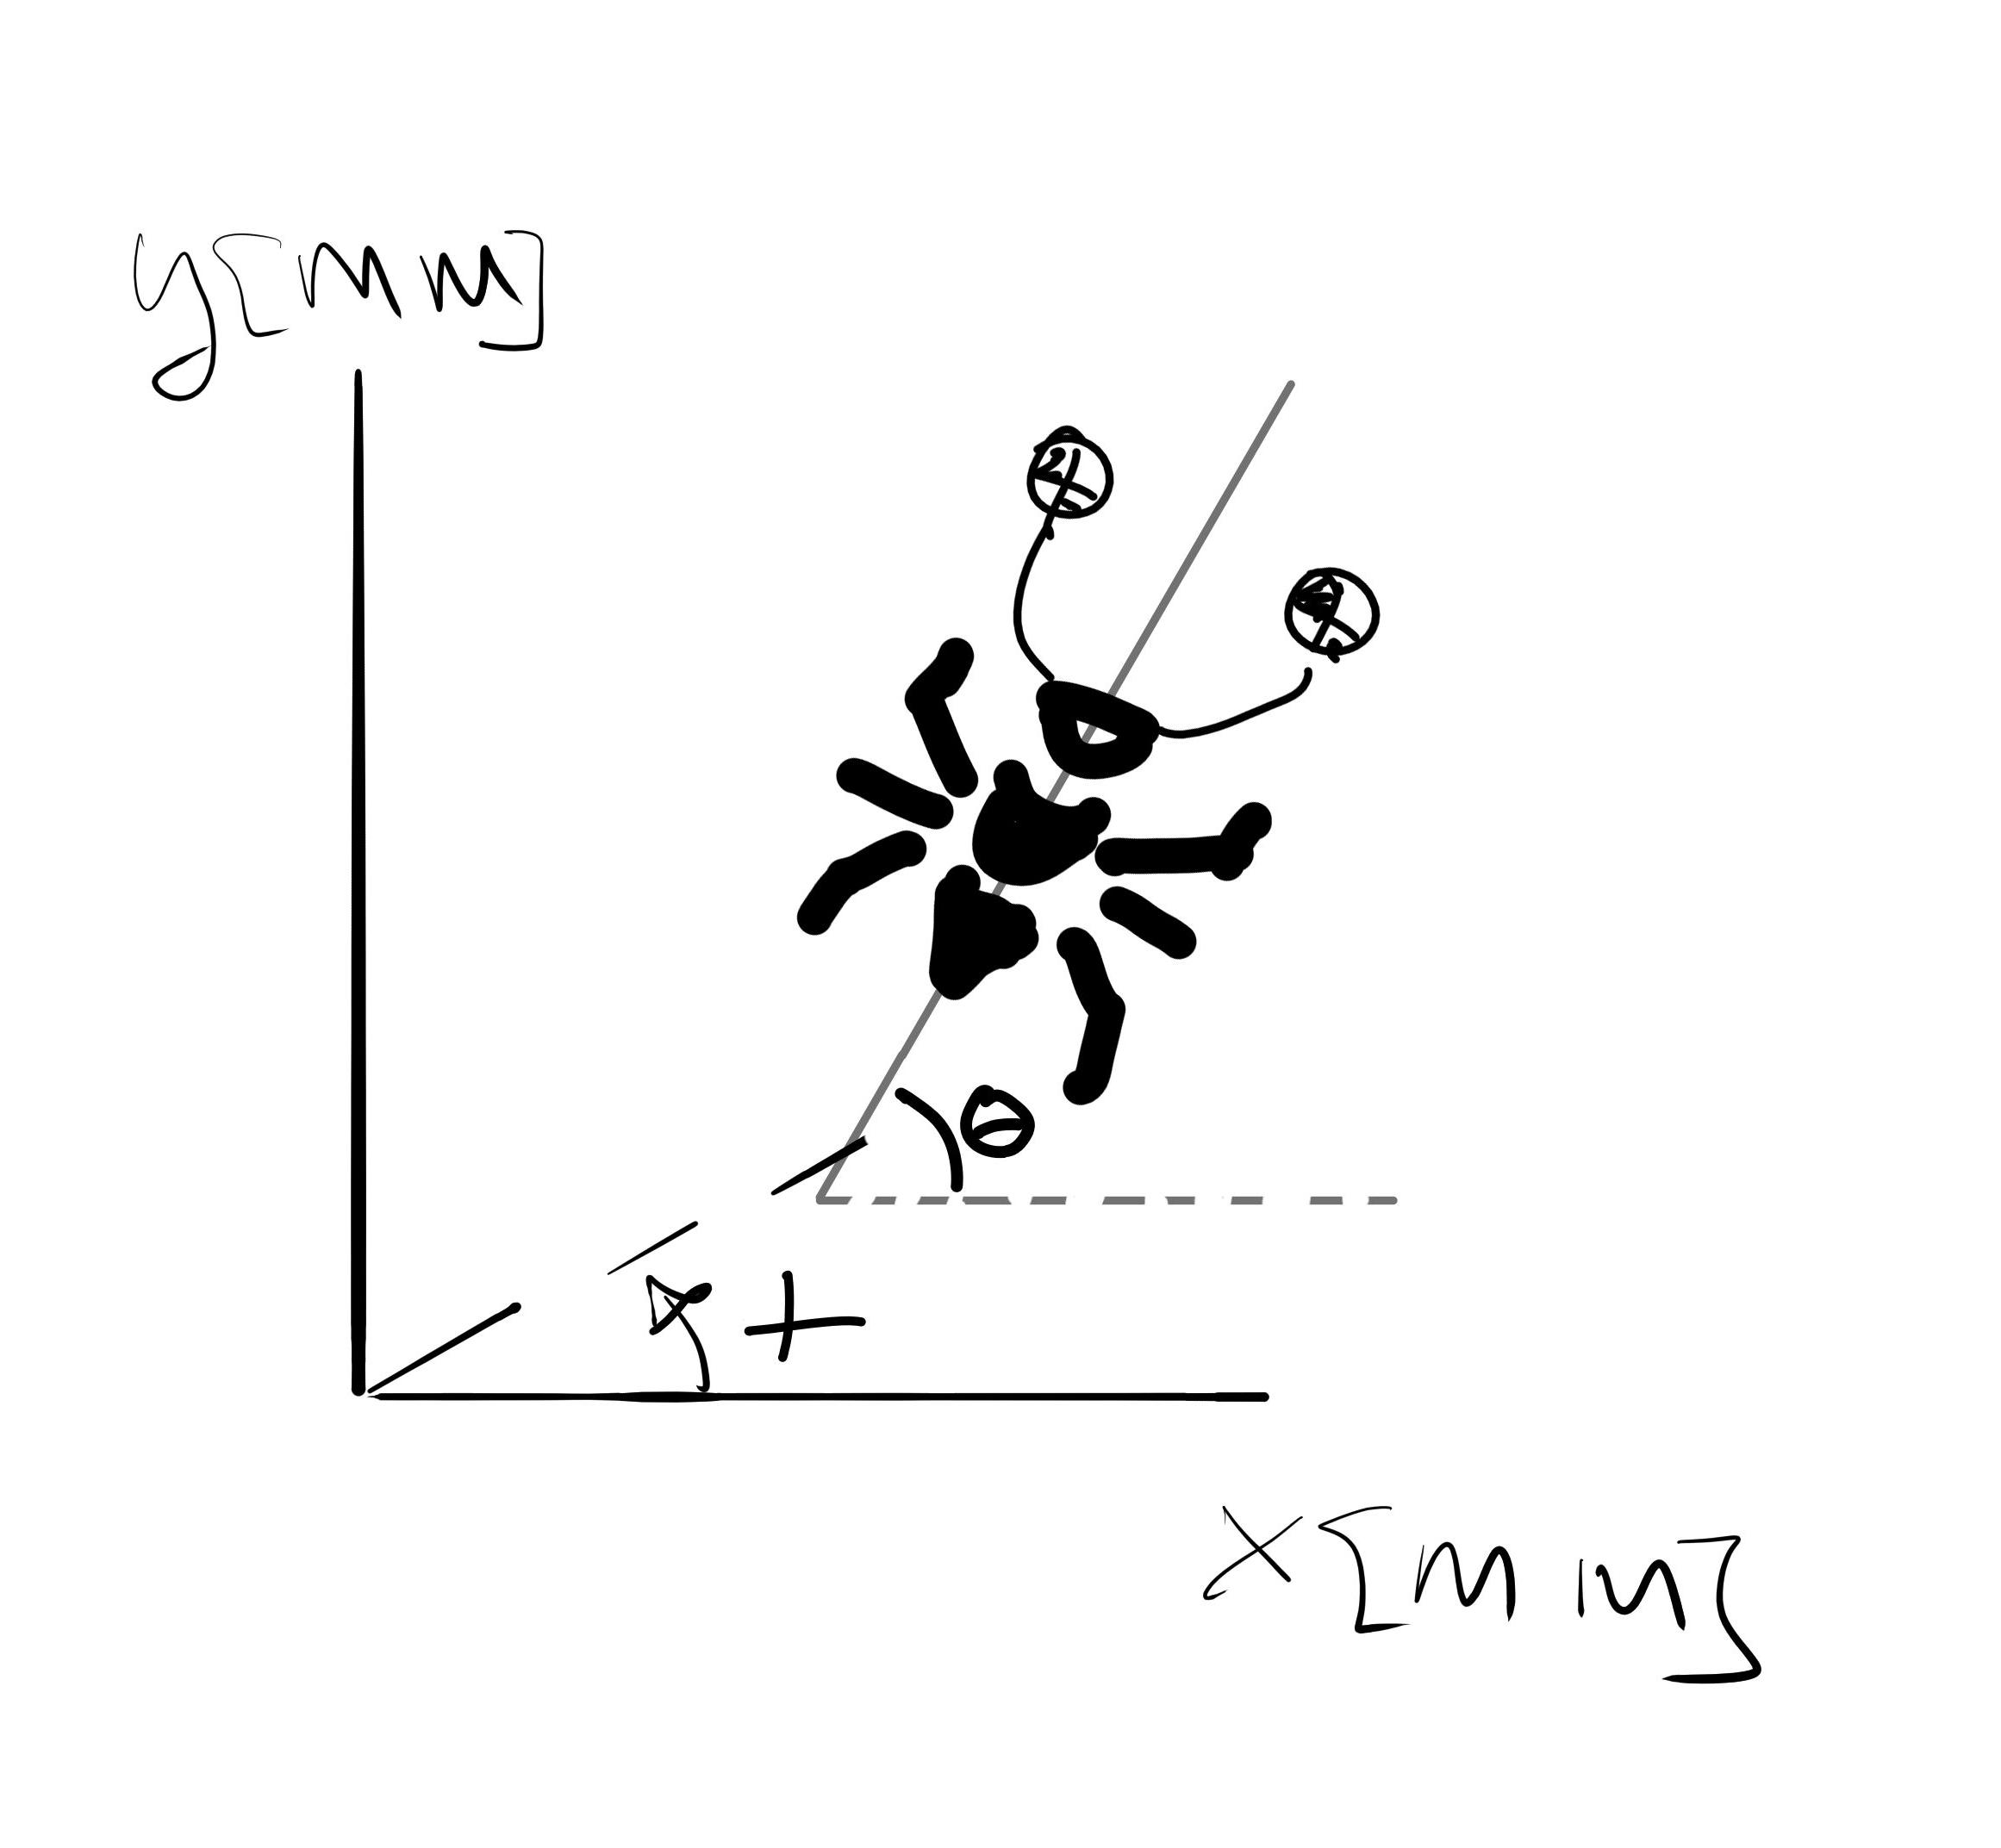
 - angular velocity $\dot\theta$:
     - gain $K$
     - pheromone quantity $\tau$
     - noise $\epsilon \sim (0,I)$
     $$ \theta[t+dt] = \theta[t] + K\cdot(\tau_L-\tau_R +\epsilon) $$


<IPython.core.display.Javascript object>


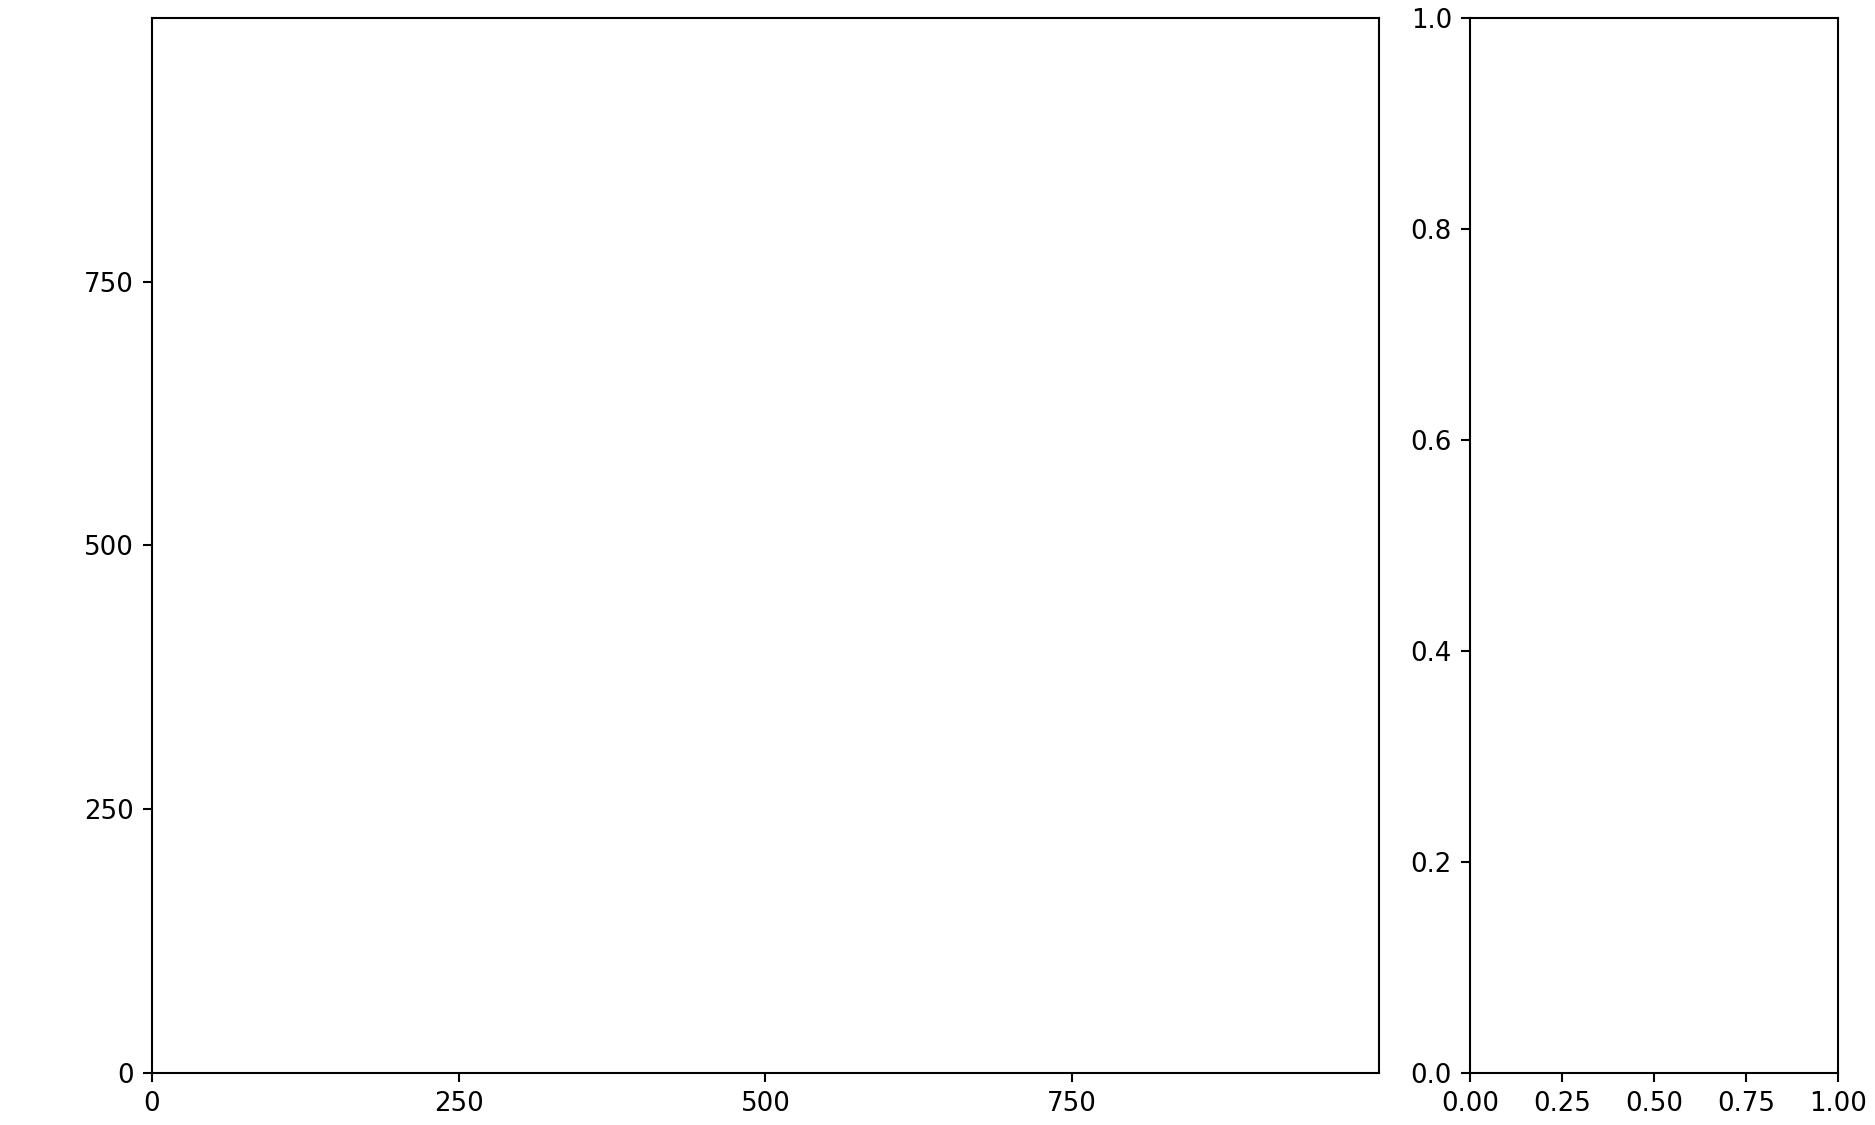

<IPython.core.display.Javascript object>


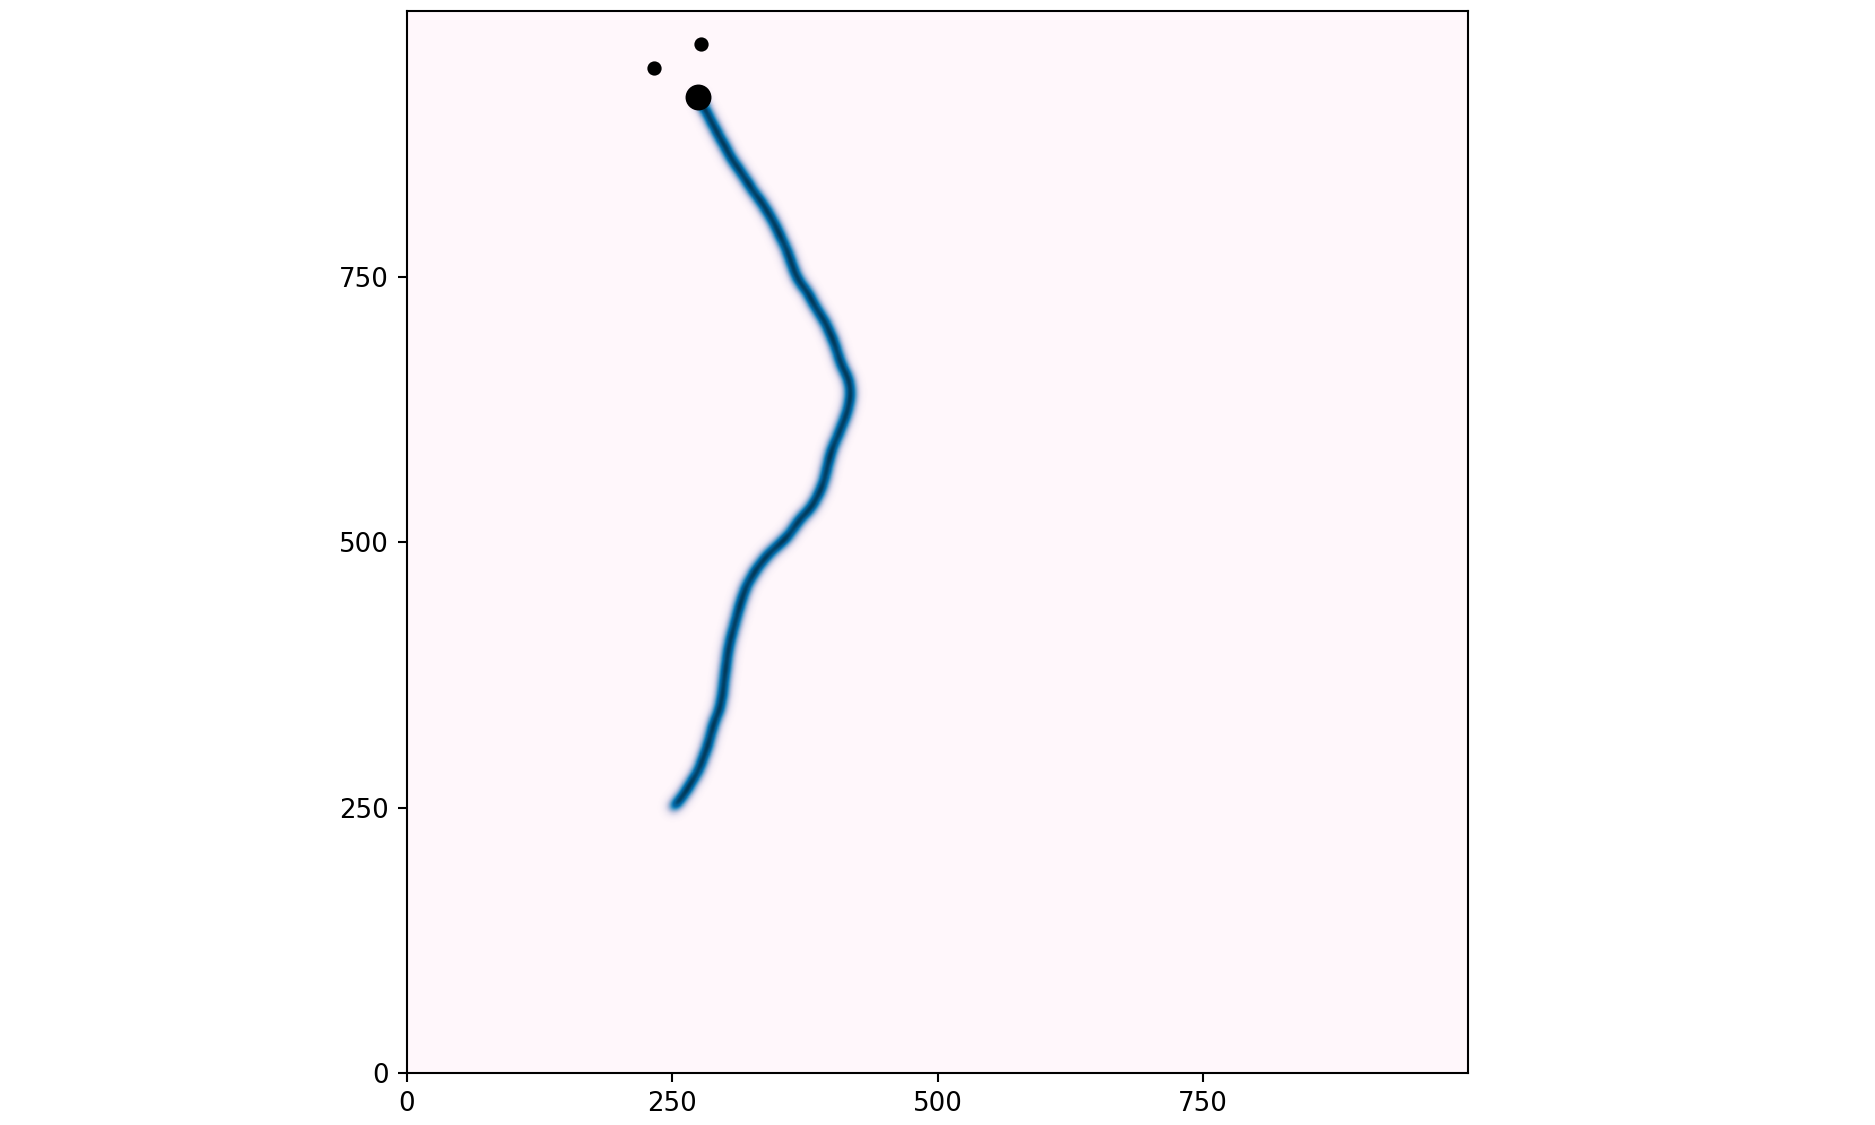

In [2]:
%matplotlib notebook
from test_plot import run_plot
run_plot(beta=1e-6,gain = 2, n=200, dt =.25)


# Exponentially distributed random variable


Construct noise sequence $\epsilon$
$$ \epsilon(k) = X(k)\cdot\alpha(k)$$

$$ X = \text{sign}(x) \in [t, t+\delta \mathbf{t}(k)] \rightarrow \mathbb{E}[X] = 0$$

$$ 	\mathbf{\delta t}(k) = f(\gamma(k),\beta) = \beta e^{−\beta \gamma}$$


- random sign variable $x(k) \sim [0,I]$
- random uniform distributed variable $\alpha(k) \sim [\frac{1}{2},\frac{1}{12}]$
- random uniform distributed variable $\gamma(k) \sim [\frac{1}{2},\frac{1}{12}]$


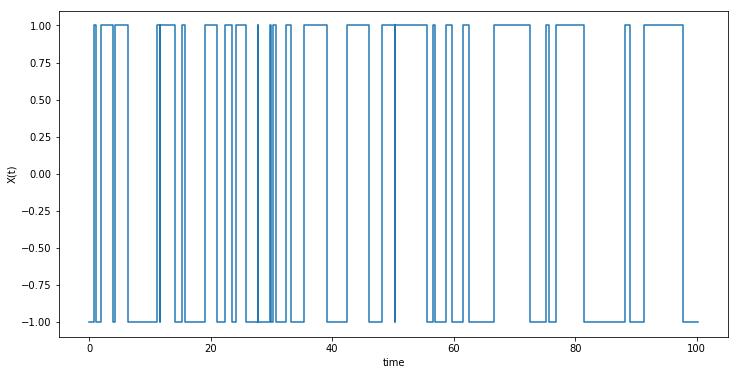

In [12]:
%matplotlib inline
timer = 0
beta = 1
t_vec = []
X = []
dt = 1
while timer < 100:
    " calculate interval length "
    timer += np.random.exponential(beta)
    
    " append time vector "
    t_vec.append(timer)
    
    " append sign vector "
    X.append(np.sign(np.random.randn()))
    
" plot results "
fig, ax = plt.subplots(figsize = (12,6))
ax.step(t_vec,X)
ax.set_xlabel('time')
ax.set_ylabel('X(t)')
plt.show()

In [4]:
class RNG(np.random.RandomState):
    def __init__(self,beta = 1):
        " inherrit the numpy random number generator "
        super().__init__()
        self.t = 0 #countdown timer
        self.beta = beta
        self.sign = 0

    @property
    def step(self):
        return self.t
    @step.setter
    def step(self,dt):
        self.t-=dt

    def exp_signed_rand(self,dt):
        " update time step "
        self.step = dt
        
        " check if new number sign is to be drawn "
        if self.step <=0:
            " draw random sign "
            self.sign = np.sign(self.randn()) # 1 or -1 (exceptionally rare: 0)
            
            " calculate next interval length"
            self.t = self.exponential(self.beta)
        
        return self.sign*self.rand()

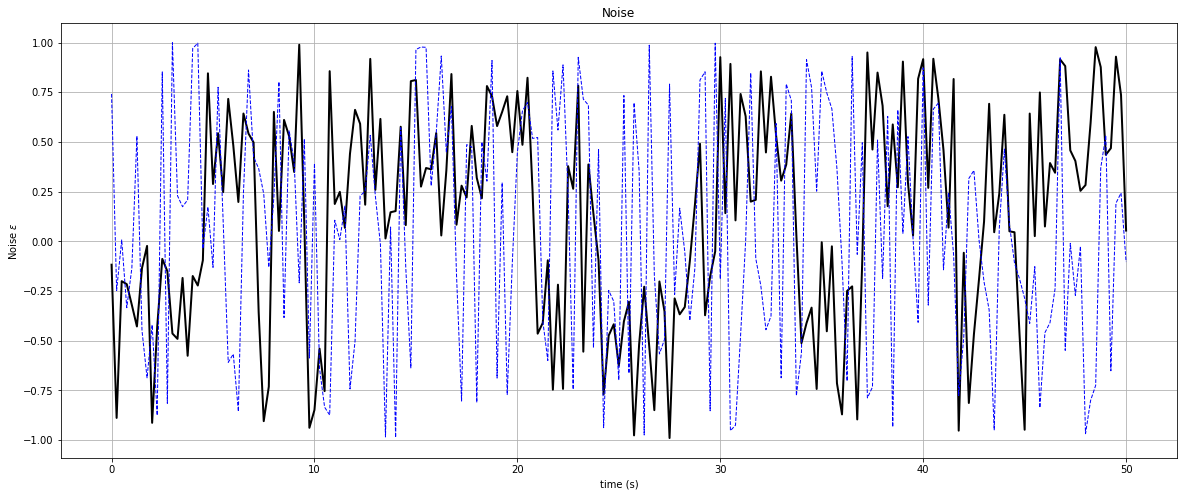

In [5]:
%matplotlib inline
dt = .25
rng = RNG(1)
t = np.arange(0,50+dt,dt)
alpha_exp = np.array([rng.exp_signed_rand(dt) for _ in t])
alpha_uni = np.array([2*(rng.rand()-0.5) for _ in t])

fig, ax = plt.subplots(figsize = (20,8))
lines = ax.plot(t, alpha_exp,t,alpha_uni,color='k')
l1, l2 = lines
plt.setp(l2, linestyle='--')       # set both to dashed
plt.setp(l1, linewidth=2, color='k')  # line1 is thick and red
plt.setp(l2, linewidth=1, color='b')  # line2 is thinner and green

ax.set(xlabel='time (s)', ylabel=r'Noise $\epsilon$',
       title='Noise')
ax.grid()

fig.savefig("test.png")
plt.show()

<IPython.core.display.Javascript object>


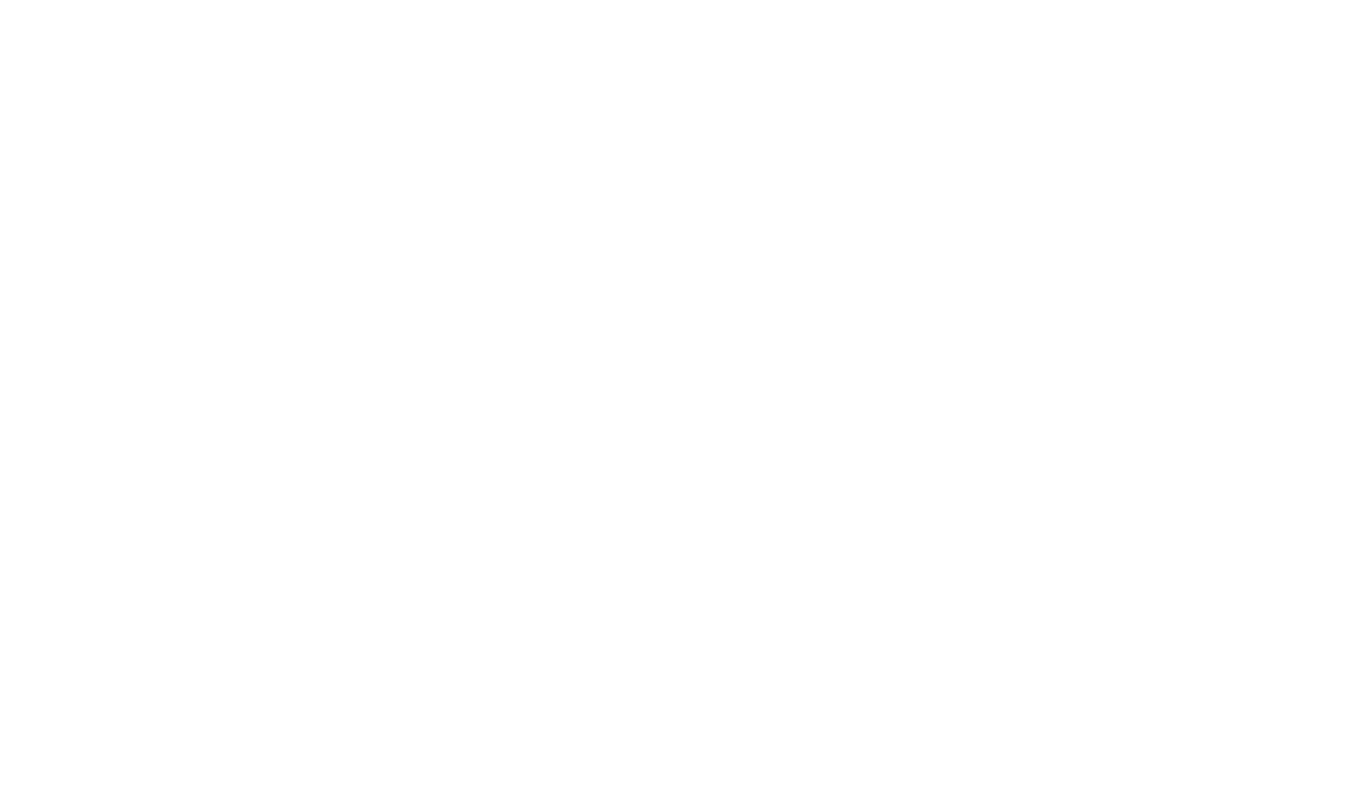

<IPython.core.display.Javascript object>


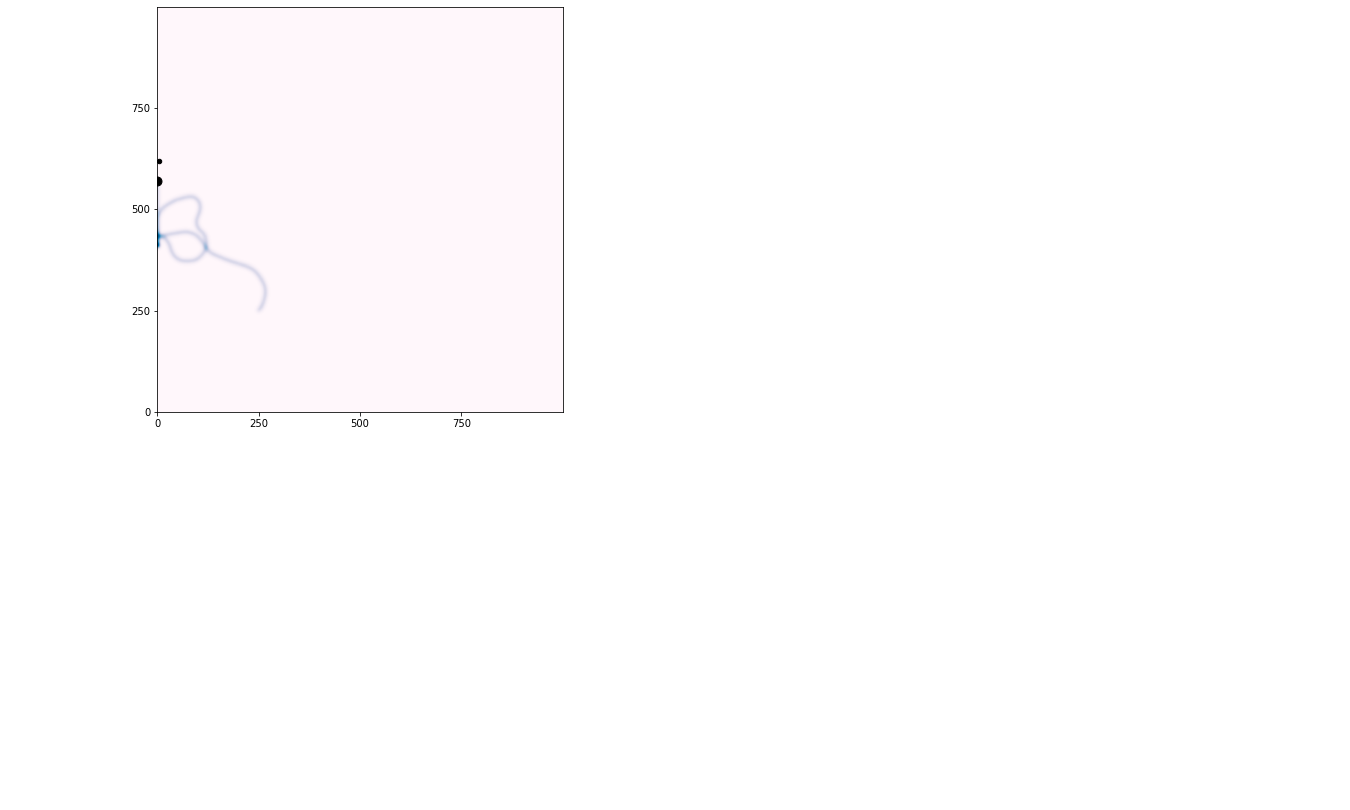

<IPython.core.display.Javascript object>


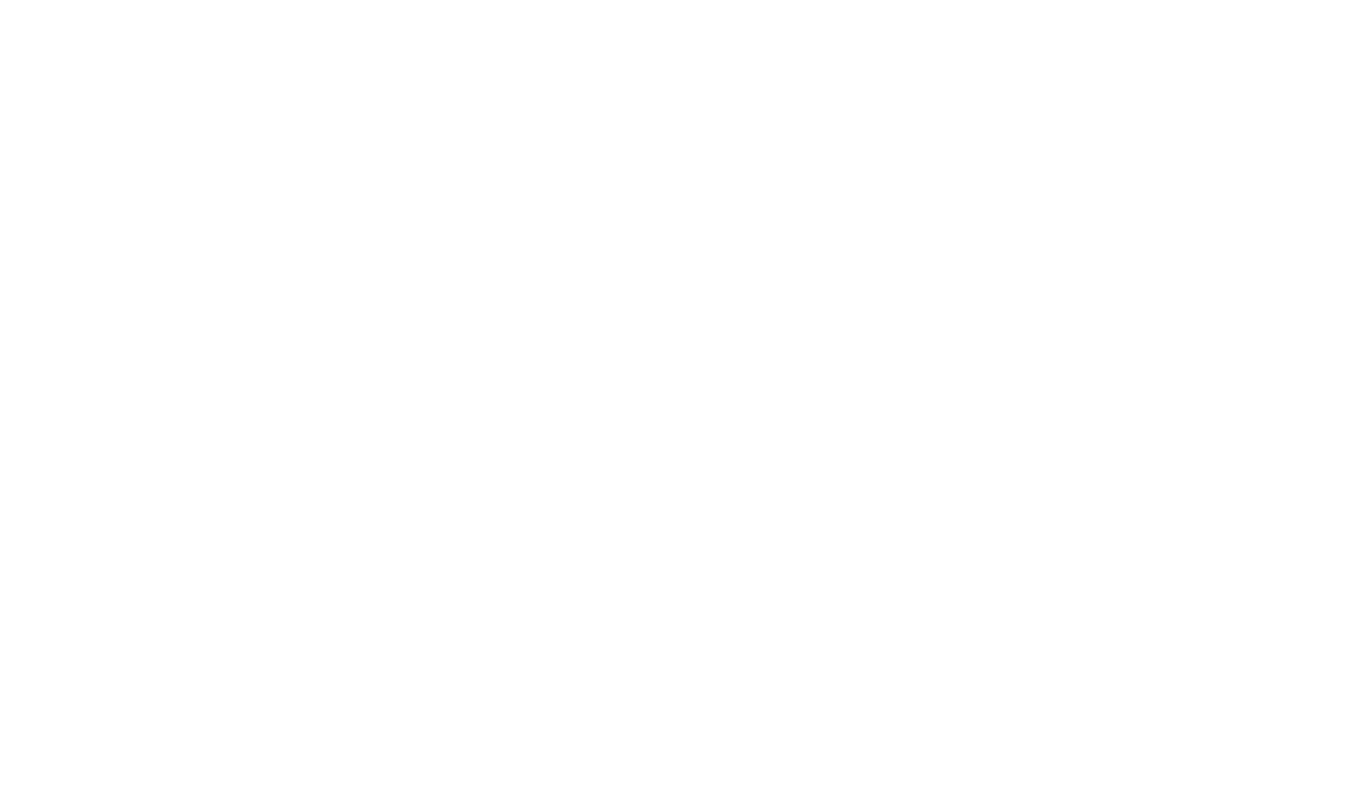

<IPython.core.display.Javascript object>


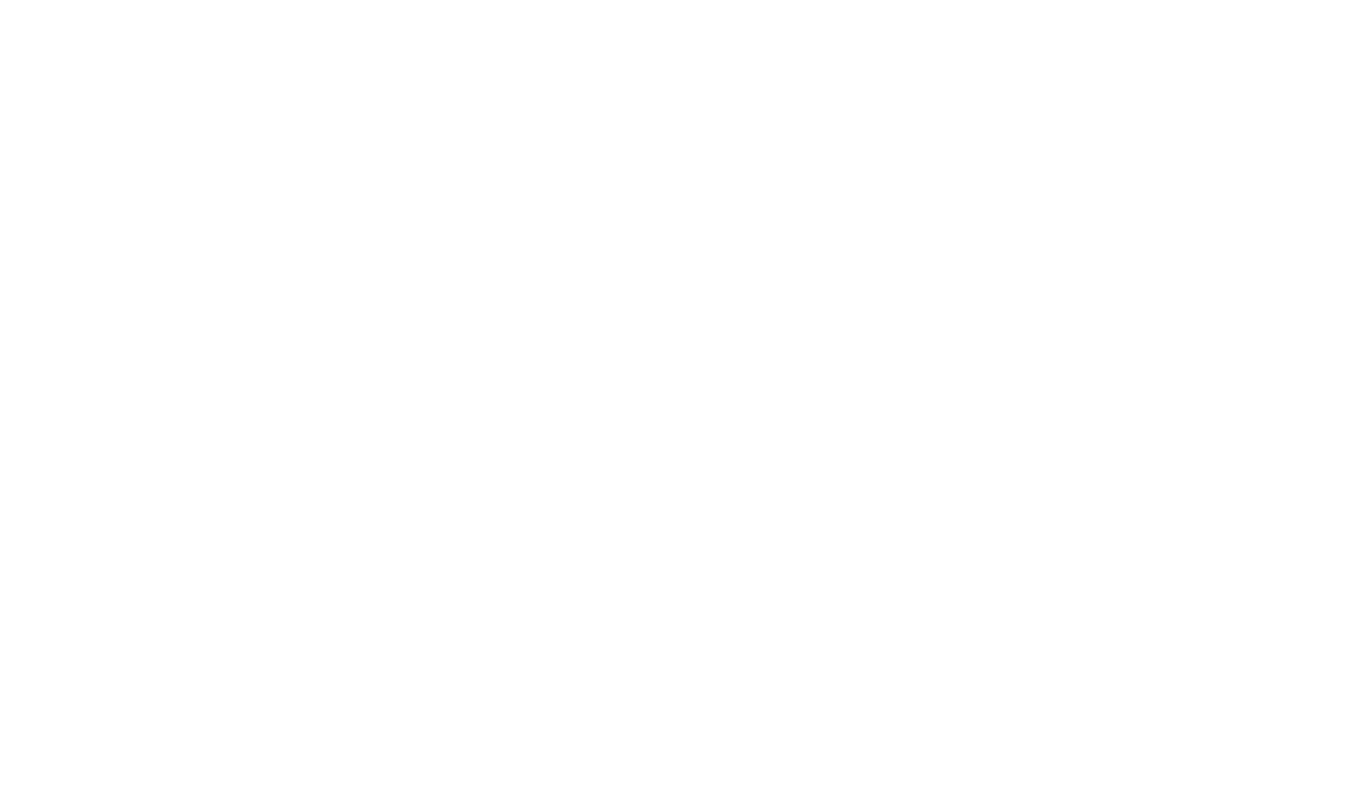

In [6]:
%matplotlib notebook
run_plot(beta=2.5,gain = 2, n=300, dt =.25)

## Benefits

- Ant behaviour matches literature
- Ants get 'unstuck' faster at boundary
- Improves exploitation

## Disadvantage
- Ant is not a pure markovian agent anymore
$$ \mathbb{E}[\epsilon(t+\delta t)|\epsilon(t)] = E[\epsilon(t)]$$